### checking


In [102]:
import duckdb

with duckdb.connect("data/sakila.duckdb") as conn:
    description = conn.sql("DESC;").df()

#description

In [103]:
dfs = {}

with duckdb.connect("data/sakila.duckdb") as conn:
    for name in description["name"]:
        if name[0] != "_":
            dfs[name] = conn.sql(f"FROM staging.{name};").df()
            duckdb.register(name, dfs[name])

dfs.keys()

dict_keys(['actor', 'address', 'category', 'city', 'country', 'customer', 'film', 'film_actor', 'film_category', 'inventory', 'language', 'payment', 'rental', 'staff', 'store'])

In [104]:
duckdb.sql("desc;").df()
# or duckdb.sql("desc;")

,database,schema,name,column_names,column_types,temporary
0,temp,main,actor,"[actor_id, first_name, last_name, last_update,...","[DOUBLE, VARCHAR, VARCHAR, TIMESTAMP, VARCHAR,...",True
1,temp,main,address,"[address_id, address, address2, district, city...","[BIGINT, VARCHAR, ""NULL"", VARCHAR, BIGINT, VAR...",True
2,temp,main,category,"[category_id, name, last_update, _dlt_load_id,...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",True
3,temp,main,city,"[city_id, city, country_id, last_update, _dlt_...","[BIGINT, VARCHAR, BIGINT, TIMESTAMP, VARCHAR, ...",True
4,temp,main,country,"[country_id, country, last_update, _dlt_load_i...","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR, VARCHAR]",True
5,temp,main,customer,"[customer_id, store_id, first_name, last_name,...","[BIGINT, BIGINT, VARCHAR, VARCHAR, VARCHAR, BI...",True
6,temp,main,film,"[film_id, title, description, release_year, la...","[BIGINT, VARCHAR, VARCHAR, VARCHAR, BIGINT, BI...",True
7,temp,main,film_actor,"[actor_id, film_id, last_update, _dlt_load_id,...","[BIGINT, BIGINT, TIMESTAMP, VARCHAR, VARCHAR]",True
8,temp,main,film_category,"[film_id, category_id, last_update, _dlt_load_...","[BIGINT, BIGINT, TIMESTAMP, VARCHAR, VARCHAR]",True
9,temp,main,inventory,"[inventory_id, film_id, store_id, last_update,...","[BIGINT, BIGINT, BIGINT, TIMESTAMP, VARCHAR, V...",True


### Task 1 - EDA in python


a) Which movies are longer than 3 hours (180 minutes), show the title and its length?


In [105]:
#description.column_names[9]
# example of use: dfs["film"]

In [109]:
# add minutes in the title after length

over_3h_movies = duckdb.sql("""
        SELECT 
            title, 
            length
        FROM 
            film
        WHERE 
            length > 180
        ORDER BY 
            length DESC;
    """).df()

over_3h_movies.head()

,title,length
0,WORST BANGER,185
1,CHICAGO NORTH,185
2,CONTROL ANTHEM,185
3,DARN FORRESTER,185
4,SWEET BROTHERHOOD,185


b) Which movies have the word "love" in its title? Show the following columns

In [ ]:
love_in_titles = duckdb.sql("""
        SELECT 
            title, rating, length, description
        FROM 
            main.film
        WHERE 
            regexp_matches(title, '(?i)\\blove\\b');
    """).df()

love_in_titles



,title,rating,length,description
0,GRAFFITI LOVE,PG,117,A Unbelieveable Epistle of a Sumo Wrestler And...
1,IDAHO LOVE,PG-13,172,A Fast-Paced Drama of a Student And a Crocodil...
2,INDIAN LOVE,NC-17,135,A Insightful Saga of a Mad Scientist And a Mad...
3,LAWRENCE LOVE,NC-17,175,A Fanciful Yarn of a Database Administrator An...
4,LOVE SUICIDES,R,181,A Brilliant Panorama of a Hunter And a Explore...


c) Calculate descriptive statistics on the length column, The Manager wants, shortest, average, median and
longest movie length

In [ ]:
film_duration = duckdb.sql(""" 
    SELECT
        MIN(length) as shortest_duration,
        ROUND(AVG(length)) as mean_duration,
        MEDIAN(length) as median_duration, 
        MAX(length) as longest_duration 
    FROM
        main.film;
    """).df()

film_duration

,shortest_duration,mean_duration,median_duration,longest_duration
0,46,115.0,114.0,185


d) The rental rate is the cost to rent a movie and the rental duration is the number of days a customer can
keep the movie. The Manager wants to know the 10 most expensive movies to rent per day

In [ ]:
film_duration = duckdb.sql(""" 
    SELECT 
        title, 
        rental_duration, 
        rental_rate, 
        (rental_rate/rental_duration) AS rent_day
    FROM
        main.film
    ORDER BY
        rent_day DESC
    LIMIT 10;
    """).df()

film_duration

,title,rental_duration,rental_rate,rent_day
0,AMERICAN CIRCUS,3,4.99,1.663333
1,BACKLASH UNDEFEATED,3,4.99,1.663333
2,BILKO ANONYMOUS,3,4.99,1.663333
3,BEAST HUNCHBACK,3,4.99,1.663333
4,CARIBBEAN LIBERTY,3,4.99,1.663333
5,AUTUMN CROW,3,4.99,1.663333
6,CASPER DRAGONFLY,3,4.99,1.663333
7,ACE GOLDFINGER,3,4.99,1.663333
8,BEHAVIOR RUNAWAY,3,4.99,1.663333
9,CASUALTIES ENCINO,3,4.99,1.663333


e) Which actors have played in most movies? Show the top 10 actors with the number of movies they have
played in.


In [110]:
top_10_actors = duckdb.sql(""" 
    SELECT
        a.actor_id, 
        a.first_name || ' ' || a.last_name AS actor_name,
        COUNT(fa.film_id) AS movie_count
    FROM
        main.actor a
    LEFT JOIN 
        main.film_actor fa ON a.actor_id = fa.actor_id
    GROUP BY
        a.actor_id, a.first_name, a.last_name
    HAVING COUNT(fa.film_id) > 0 
    ORDER BY
        movie_count DESC
    LIMIT 10;
    """).df()

top_10_actors

,actor_id,actor_name,movie_count
0,107.0,GINA DEGENERES,42
1,102.0,WALTER TORN,41
2,198.0,MARY KEITEL,40
3,181.0,MATTHEW CARREY,39
4,23.0,SANDRA KILMER,37
5,81.0,SCARLETT DAMON,36
6,144.0,ANGELA WITHERSPOON,35
7,37.0,VAL BOLGER,35
8,60.0,HENRY BERRY,35
9,106.0,GROUCHO DUNST,35


f) Now it's time for you to choose your own question to explore the sakila database! Write down 3-5
questions you want to answer and then answer them using pandas and duckdb.


In [ ]:
# duckdb.sql("desc;").df() if needed to see again

Question 1: Which are the top 3 most rented film categories? 

In [ ]:
top_3_categories = duckdb.sql("""
    SELECT
        c.name as Category,
        COUNT(r.rental_id) as total_rentals 
    FROM
        main.category c 
    JOIN main.film_category fc ON c.category_id = fc.category_id 
    JOIN main.film f ON fc.film_id = f.film_id 
    JOIN main.inventory inv ON f.film_id = inv.film_id
    JOIN main.rental r ON inv.inventory_id = r.inventory_id 
    GROUP BY
        c.name 
    ORDER BY
        total_rentals DESC 
    LIMIT 3;
    """).df()

top_3_categories

,Category,total_rentals
0,Sports,1179
1,Animation,1166
2,Action,1112


Question 2: Who are the churned customers (full name, email, last rental date) to email them a voucher to reactivate them

In [ ]:
check_active = duckdb.sql("DESC main.customer;").df()

check_active
# Note: active is a str/VARCHAR, not Boolean

,column_name,column_type,null,key,default,extra
0,customer_id,BIGINT,YES,None,None,None
1,store_id,BIGINT,YES,None,None,None
2,first_name,VARCHAR,YES,None,None,None
3,last_name,VARCHAR,YES,None,None,None
4,email,VARCHAR,YES,None,None,None
5,address_id,BIGINT,YES,None,None,None
6,active,VARCHAR,YES,None,None,None
7,create_date,TIMESTAMP,YES,None,None,None
8,last_update,TIMESTAMP,YES,None,None,None
9,_dlt_load_id,VARCHAR,YES,None,None,None


In [ ]:
# active is a str/VARCHAR with '0' and '1'
check_active2 = duckdb.sql(""" 
    SELECT
        active,
        COUNT(*) as active_count
    FROM
        main.customer
    GROUP BY active 
    ORDER BY active_count;
    """).df()

check_active2

,active,active_count
0,0,15
1,1,584


In [ ]:
churn_cust_list = duckdb.sql(""" 
    SELECT
        cust.customer_id, 
        CONCAT(cust.first_name,' ', cust.last_name) AS customer_name, 
        MIN(r.rental_date) as first_rental, 
        MAX(r.rental_date) as last_rental, 
        cust.email, 
    FROM
        main.customer cust 
    LEFT JOIN main.rental r ON cust.customer_id =  r.customer_id 
    WHERE cust.active = '0' 
    GROUP BY ALL 
    ORDER BY customer_name;
    """).df()

churn_cust_list

,customer_id,customer_name,first_rental,last_rental,email
0,510,BEN EASTER,2005-05-25 11:13:34,2005-08-22 10:46:44,BEN.EASTER@sakilacustomer.org
1,534,CHRISTIAN JUNG,2005-05-26 21:21:28,2006-02-14 15:16:03,CHRISTIAN.JUNG@sakilacustomer.org
2,169,ERICA MATTHEWS,2005-05-28 04:28:38,2005-08-23 09:33:22,ERICA.MATTHEWS@sakilacustomer.org
3,368,HARRY ARCE,2005-05-25 09:21:29,2005-08-23 00:31:09,HARRY.ARCE@sakilacustomer.org
4,241,HEIDI LARSON,2005-05-28 17:04:43,2005-08-23 13:14:15,HEIDI.LARSON@sakilacustomer.org
5,558,JIMMIE EGGLESTON,2005-06-17 09:19:52,2005-08-21 06:53:53,JIMMIE.EGGLESTON@sakilacustomer.org
6,64,JUDITH COX,2005-05-28 00:39:31,2006-02-14 15:16:03,JUDITH.COX@sakilacustomer.org
7,315,KENNETH GOODEN,2005-05-28 06:20:55,2006-02-14 15:16:03,KENNETH.GOODEN@sakilacustomer.org
8,482,MAURICE CRAWLEY,2005-05-26 15:32:46,2005-08-23 16:42:53,MAURICE.CRAWLEY@sakilacustomer.org
9,406,NATHAN RUNYON,2005-05-30 02:00:28,2005-08-21 17:45:52,NATHAN.RUNYON@sakilacustomer.org


Question 3: Which stores generated the least revenues in 2006?

In [ ]:
# First I need to check how many stores there are.
stores_count = duckdb.sql(""" 
    SELECT 
        COUNT(*) AS store_count 
    FROM main.store;
    """).df()
stores_count

,store_count
0,2


In [ ]:
# Checking rental column 
duckdb.sql("desc main.rental;").df()

,column_name,column_type,null,key,default,extra
0,rental_id,BIGINT,YES,None,None,None
1,rental_date,TIMESTAMP,YES,None,None,None
2,inventory_id,BIGINT,YES,None,None,None
3,customer_id,BIGINT,YES,None,None,None
4,return_date,TIMESTAMP,YES,None,None,None
5,staff_id,BIGINT,YES,None,None,None
6,last_update,TIMESTAMP,YES,None,None,None
7,_dlt_load_id,VARCHAR,YES,None,None,None
8,_dlt_id,VARCHAR,YES,None,None,None


In [ ]:
# How many business years?
rental_years = duckdb.sql(""" 
    SELECT 
        DISTINCT YEAR(rental_date) as rental_year 
    FROM main.rental 
    ORDER BY rental_year;
    """).df()
rental_years

,rental_year
0,2005
1,2006


In [ ]:
revenue_stores_2006 = duckdb.sql("""
    SELECT 
        s.store_id, 
        CONCAT(ad.address, ', ', ci.city, ', ', cou.country) AS full_address, 
        SUM(p.amount) AS total_revenue, 
    FROM 
        main.payment p 
    JOIN main.rental r ON p.rental_id = r.rental_id 
    JOIN main.inventory i ON r.inventory_id = i.inventory_id 
    JOIN main.store s ON i.store_id = s.store_id 
    JOIN main.address ad ON s.address_id = ad.address_id 
    JOIN main.city ci ON ad.city_id = ci.city_id 
    JOIN main.country cou ON ci.country_id = cou.country_id 
    WHERE
        EXTRACT(YEAR FROM p.payment_date) = 2006 
    GROUP BY 
        s.store_id, ad.address, ci.city, cou.country  
    ORDER BY
        total_revenue ASC;
    """).df()

revenue_stores_2006   
                                  

,store_id,full_address,total_revenue
0,1,"47 MySakila Drive, Lethbridge, Canada",243.10
1,2,"28 MySQL Boulevard, Woodridge, Australia",271.08


In [ ]:
# Checking the above for 2006 as very low revenues

sales_check_2006 = duckdb.sql(""" 
    SELECT 
        s.store_id, 
        EXTRACT(MONTH FROM p.payment_date) AS month, 
        COUNT(p.payment_id) AS rentals_transaction, 
        ROUND(SUM(p.amount), 2) AS revenue, 
    FROM 
        main.payment p 
    JOIN main.customer cust ON cust.customer_id = p.customer_id 
    JOIN main.store s ON cust.store_id = s.store_id 
    WHERE
        EXTRACT(YEAR FROM p.payment_date) = 2006 
    GROUP BY
        s.store_id, EXTRACT(MONTH FROM p.payment_date), 
    ORDER BY
        s.store_id, EXTRACT(MONTH FROM p.payment_date);
    """).df() 

sales_check_2006



,store_id,month,rentals_transaction,revenue
0,1,2,98,283.02
1,2,2,84,231.16


In [ ]:
# Checking if transactions numbers match, should be 182 in 2006 
check_monthly_transactions = duckdb.sql("""
    SELECT 
        EXTRACT(YEAR FROM payment_date) AS year, 
        EXTRACT(MONTH FROM payment_date) AS month, 
        COUNT(p.payment_id) AS transactions, 
        ROUND(SUM(p.amount), 2) AS revenue
    FROM
        main.payment p 
    GROUP BY ALL 
    ORDER BY
        year, month;
    """).df()

check_monthly_transactions

,year,month,transactions,revenue
0,2005,5,1157,4824.43
1,2005,6,2312,9631.88
2,2005,7,6711,28373.89
3,2005,8,5687,24072.13
4,2006,2,182,514.18


### Task 2 - graphs

a) Who are our top 5 customers by total spend? The Manager wants to know so that they can reward them
with special offers. Create a bar chart showing the top 5 customers by total spend.

In [ ]:
top_5_customers = duckdb.sql(""" 
    SELECT 
        cust.customer_id, 
        cust.first_name || ' ' || cust.last_name AS customer, 
        SUM(p.amount) AS total_spend 
    FROM
        main.customer cust 
    LEFT JOIN main.payment p ON cust.customer_id = p.customer_id 
    GROUP BY
        cust.customer_id, customer 
    ORDER BY
        total_spend DESC 
    LIMIT 5;
    """).df()

top_5_customers


,customer_id,customer,total_spend
0,526,KARL SEAL,221.55
1,148,ELEANOR HUNT,216.54
2,144,CLARA SHAW,195.58
3,178,MARION SNYDER,194.61
4,137,RHONDA KENNEDY,194.61


In [ ]:
top_5_customers.info

<bound method DataFrame.info of    customer_id        customer  total_spend
0          526       KARL SEAL       221.55
1          148    ELEANOR HUNT       216.54
2          144      CLARA SHAW       195.58
3          178   MARION SNYDER       194.61
4          137  RHONDA KENNEDY       194.61>

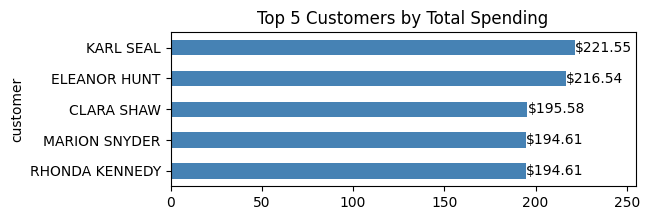

In [ ]:
ax = top_5_customers.plot(
    kind='barh',              
    x='customer',             
    y='total_spend',
    figsize=(6, 2),
    color='steelblue',
    legend=False,
    title='Top 5 Customers by Total Spending'
    )

ax.invert_yaxis()
ax.bar_label(ax.containers[0], fmt='$%.2f') # took from LLM to make values appear 
ax.margins(x=0.15)                          # took from LLM to make values appear   


b) How much money does each film category bring in? Make a bar chart showing total revenue per film
category.


In [ ]:
revenue_per_category = duckdb.sql("""
    SELECT
        c.name AS category_name,
        SUM(p.amount) AS revenues                                              
    FROM
        category c
    LEFT JOIN film_category fc ON c.category_id = fc.category_id
    LEFT JOIN film f ON fc.film_id = f.film_id
    LEFT JOIN inventory inv ON f.film_id = inv.film_id
    LEFT JOIN rental r ON inv.inventory_id = r.inventory_id
    LEFT JOIN payment p ON r.rental_id = p.rental_id
    GROUP BY c.name
    ORDER BY revenues DESC;
""").df()

revenue_per_category

,category_name,revenues
0,Sports,5314.21
1,Sci-Fi,4756.98
2,Animation,4656.30
3,Drama,4587.39
4,Comedy,4383.58
5,Action,4375.85
6,New,4351.62
7,Games,4281.33
8,Foreign,4270.67
9,Family,4226.07


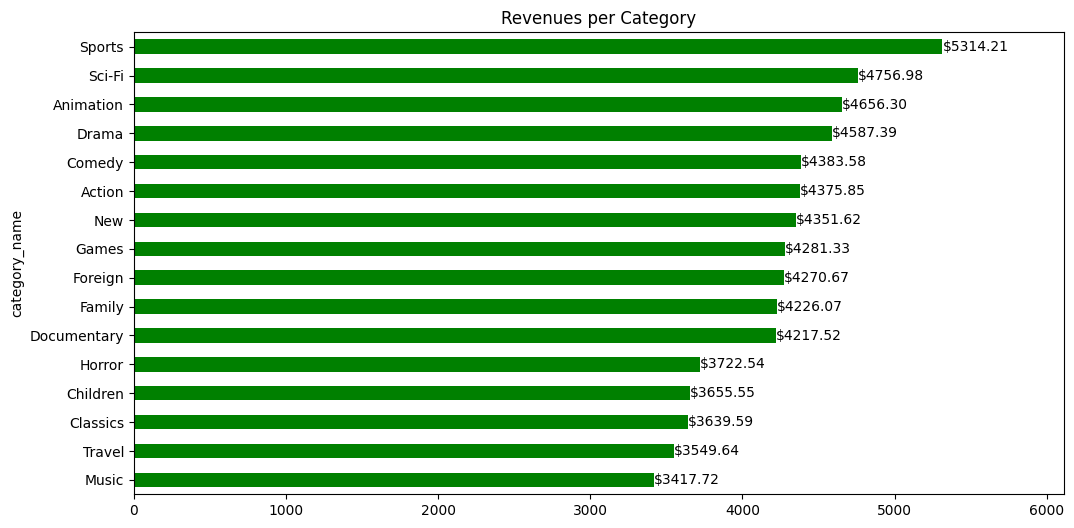

In [ ]:
ax = revenue_per_category.plot(
    kind='barh',              
    x='category_name',             
    y='revenues',
    figsize=(12, 6),
    color='green',
    legend=False,
    title='Revenues per Category'
    )

ax.invert_yaxis()
ax.bar_label(ax.containers[0], fmt='$%.2f') 
ax.margins(x=0.15)               

### Task 3 - BI report
